In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# <center>Leitura do banco de dados</center>

In [2]:
df = pd.read_csv('dados_disciplinas.txt', sep=',')

display(df)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
...,...,...,...,...,...,...,...
4637,827,2017,2,Reprovado,3,10,5
4638,828,2014,1,Reprovado por Frequencia,0,32,2
4639,829,2013,2,Reprovado por Frequencia,0,72,1
4640,830,2014,1,Reprovado por Frequencia,12,28,2


# <center>Contagem dos parâmetros para o df completo</center>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4642 entries, 0 to 4641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MATR_ALUNO   4642 non-null   int64 
 1   ANO          4642 non-null   int64 
 2   PERIODO      4642 non-null   int64 
 3   SITUACAO     4642 non-null   object
 4   MEDIA_FINAL  4642 non-null   int64 
 5   NUM_FALTAS   4642 non-null   int64 
 6   DISCIPLINA   4642 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 254.0+ KB


In [4]:
print(df['ANO'].value_counts())

ANO
2016    997
2014    987
2013    957
2017    939
2015    762
Name: count, dtype: int64


In [5]:
print(df['PERIODO'].value_counts())

PERIODO
1    2365
2    2277
Name: count, dtype: int64


In [6]:
print(df['SITUACAO'].value_counts())

SITUACAO
Aprovado                    2077
Reprovado                   1117
Reprovado por Frequencia     921
Dispensado                   456
Equivalencia curricular       37
Trancamento parcial           34
Name: count, dtype: int64


In [7]:
print(df['DISCIPLINA'].value_counts())

DISCIPLINA
2    1209
5     982
4     914
3     778
1     759
Name: count, dtype: int64


# <center>Situação dos alunos de 2013</center>

In [8]:
df_2013 = df.loc[df['ANO'] == 2013]

display(df_2013)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
...,...,...,...,...,...,...,...
1289,254,2013,2,Dispensado,-1,-1,3
1290,254,2013,2,Dispensado,-1,-1,4
1291,254,2013,2,Dispensado,-1,-1,5
4639,829,2013,2,Reprovado por Frequencia,0,72,1


In [9]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 0 to 4641
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MATR_ALUNO   957 non-null    int64 
 1   ANO          957 non-null    int64 
 2   PERIODO      957 non-null    int64 
 3   SITUACAO     957 non-null    object
 4   MEDIA_FINAL  957 non-null    int64 
 5   NUM_FALTAS   957 non-null    int64 
 6   DISCIPLINA   957 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 59.8+ KB


In [10]:
print(df_2013['PERIODO'].value_counts())

PERIODO
1    495
2    462
Name: count, dtype: int64


In [11]:
print(df_2013['SITUACAO'].value_counts())

SITUACAO
Aprovado                    372
Reprovado por Frequencia    259
Reprovado                   212
Dispensado                   96
Trancamento parcial          11
Equivalencia curricular       7
Name: count, dtype: int64


In [12]:
print(df_2013['DISCIPLINA'].value_counts())

DISCIPLINA
2    279
5    206
4    166
3    156
1    150
Name: count, dtype: int64


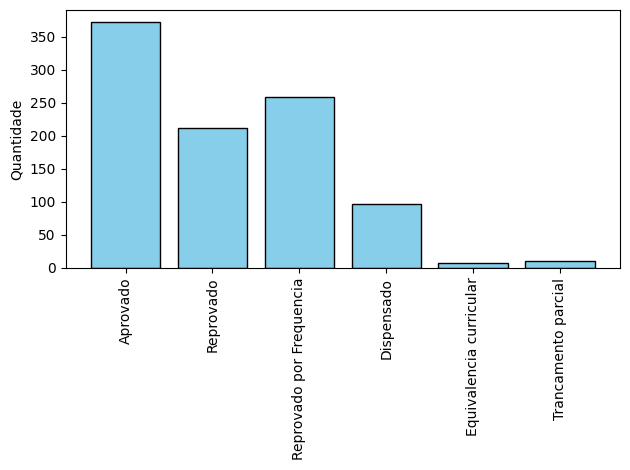

In [13]:
aprov = len(df_2013.loc[df_2013['SITUACAO'] == 'Aprovado'])
reprov = len(df_2013.loc[df_2013['SITUACAO'] == 'Reprovado'])
reprov_freq = len(df_2013.loc[df_2013['SITUACAO'] == 'Reprovado por Frequencia'])
disp = len(df_2013.loc[df_2013['SITUACAO'] == 'Dispensado'])
equiv_curr = len(df_2013.loc[df_2013['SITUACAO'] == 'Equivalencia curricular'])
tranc_parc = len(df_2013.loc[df_2013['SITUACAO'] == 'Trancamento parcial'])

categorias = ['Aprovado', 'Reprovado', 'Reprovado por Frequencia', 'Dispensado', 'Equivalencia curricular', 'Trancamento parcial']
valores = [aprov, reprov, reprov_freq, disp, equiv_curr, tranc_parc]
    
plt.bar(categorias, valores, color='skyblue', edgecolor='black')

plt.xticks(rotation=90)
plt.ylabel('Quantidade')
plt.tight_layout()

In [23]:
df_2013_1 = df_2013.loc[df_2013['PERIODO'] == 1]

display(df_2013_1)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
0,1,2013,1,Aprovado,77,12,2
1,2,2013,1,Reprovado por Frequencia,0,32,1
2,3,2013,1,Reprovado por Frequencia,0,50,4
7,6,2013,1,Reprovado por Frequencia,10,42,4
8,7,2013,1,Reprovado por Frequencia,10,45,2
...,...,...,...,...,...,...,...
820,188,2013,1,Dispensado,-1,-1,2
821,188,2013,1,Dispensado,-1,-1,3
822,188,2013,1,Reprovado por Frequencia,7,38,4
825,189,2013,1,Reprovado por Frequencia,0,22,2


In [24]:
df_2013_2 = df_2013.loc[df_2013['PERIODO'] == 2]

display(df_2013_2)

,MATR_ALUNO,ANO,PERIODO,SITUACAO,MEDIA_FINAL,NUM_FALTAS,DISCIPLINA
3,4,2013,2,Aprovado,60,2,2
4,4,2013,2,Aprovado,68,2,5
5,5,2013,2,Aprovado,60,4,2
9,8,2013,2,Equivalencia curricular,-1,-1,4
10,9,2013,2,Reprovado por Frequencia,0,66,3
...,...,...,...,...,...,...,...
1289,254,2013,2,Dispensado,-1,-1,3
1290,254,2013,2,Dispensado,-1,-1,4
1291,254,2013,2,Dispensado,-1,-1,5
4639,829,2013,2,Reprovado por Frequencia,0,72,1


## Média

In [29]:
media_2013_1 = df_2013_1['MEDIA_FINAL'].mean()

print('A média para o 1º periodo de 2013 é: ', media_2013_1)

A média para o 1º periodo de 2013 é:  44.27272727272727


In [30]:
media_2013_2 = df_2013_2['MEDIA_FINAL'].mean()

print('A média para o 2º periodo de 2013 é: ', media_2013_2)

A média para o 2º periodo de 2013 é:  33.74242424242424


## Equação da reta

## Classificação

## Agrupamento

## Predição

# <center>Situação dos alunos de 2014</center>

# <center>Situação dos alunos de 2015</center>

# <center>Situação dos alunos de 2016</center>

# <center>Situação dos alunos de 2017</center>